(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Clustering food recipes from around the world

In this assignment, you are expected to hierarchically cluster food recipes. We will be using YY Ahn's dataset "[Recipe datasets with cuisines](http://yongyeol.com/data/scirep-cuisines-detail.zip)", which for each recipe provides a list of ingredients and the country of origin, scraped from popular recipe websites. He also provides an [ingredient and compounds dataset](http://yongyeol.com/data/ingr_comp.zip), which you could potentially also make use of, if you find it interesting.

You will be graded as follow:
* Data parsing and representation **(20 pts)**
* Clustering **(30 pts)**
* Visualization **(30 pts)**
* Short (datailed) analysis of specific cluster **(20 pts)**

---------------------------

In [9]:
# Web scraping
#     1. Retrieve webpages:
#         . wget, curl: command line tool for transferring
#             data with URL syntax
#         . Fully-fledged web browsers
#             Selenium (web browser automation)
#     2. Parse and extract information form the html
#         . html/json parsers

# For retrieve Webpages:
#     Either 1. Embed command line tools (wget or curl) in python code:
            # out_file = 'test.html'
            # url = 'www.xxx.com'
            # cmd = 'curl -L -m 2 "' + url + '" >'  + ofile
            # os.system(cmd)

#     or    2. Use a python network-access libraries
#         . Urllib, Request, pycurl,etc.
#             import urllib2
#             response = urllib2.urlopen('http://www.tripadvisor.com/Hotels-g60745-Boston_Massachusetts-Hotels.html')
#             html = response.read()


import scipy.cluster.hierarchy as cl_hier
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
%matplotlib inline

# Parsing the data we have to create a new 2D matrix
countries = {}
ingredients = []


# print countries.keys()
with open('allr_recipes.txt') as f:
    for line in f:
        row = line.split('\t')
        row[len(row) - 1] = row[len(row) - 1][:-1]
        Ckeys = row[0]
        row.remove(Ckeys)    
        if Ckeys in countries.keys():
            for i in range(0, len(row)):
                
                Ckey_i = row[i]
                if Ckey_i in ingredient.keys():
                    ingredient[Ckey_i] += 1
                else:
                    if Ckey_i not in ingredients:
                        ingredients.append(Ckey_i)
                    ingredient[Ckey_i] = 1
        else:
            ingredient = {}
            countries[Ckeys] = {}
            for i in range(0, len(row)):
                Ckey_i = row[i]
                if Ckey_i not in ingredients:
                    ingredients.append(Ckey_i)
                ingredient[Ckey_i] = 1
        countries[Ckeys] = ingredient
f.close()

# print countries
print sorted(ingredients)
# print ingredient



['almond', 'angelica', 'anise', 'anise_seed', 'apple', 'apple_brandy', 'apricot', 'artichoke', 'asparagus', 'avocado', 'bacon', 'baked_potato', 'balm', 'banana', 'barley', 'bartlett_pear', 'basil', 'bay', 'bean', 'beef', 'beef_broth', 'beef_liver', 'beer', 'beet', 'bell_pepper', 'bergamot', 'berry', 'bitter_orange', 'black_bean', 'black_currant', 'black_mustard_seed_oil', 'black_pepper', 'black_raspberry', 'black_tea', 'blackberry', 'blackberry_brandy', 'blue_cheese', 'blueberry', 'bone_oil', 'bourbon_whiskey', 'brandy', 'brassica', 'bread', 'broccoli', 'brown_rice', 'brussels_sprout', 'buckwheat', 'butter', 'buttermilk', 'cabbage', 'cabernet_sauvignon_wine', 'cacao', 'camembert_cheese', 'cane_molasses', 'caraway', 'cardamom', 'carnation', 'carob', 'carrot', 'cashew', 'cassava', 'catfish', 'cauliflower', 'caviar', 'cayenne', 'celery', 'celery_oil', 'cereal', 'champagne_wine', 'chayote', 'cheddar_cheese', 'cheese', 'cherry', 'cherry_brandy', 'chervil', 'chicken', 'chicken_broth', 'chick

In [4]:
# Parsing the data we have to create a new 2D matrix
regions = {}
locations = {}

with open('map.txt') as f:
    for line in f:
        row = line.split('\t')
        row[len(row) - 1] = row[len(row) - 1][:-1]
        
        locations[row[0]] = row[1]


for country in countries.keys():
    region = locations[country]
    if region not in regions.keys():
        regions[region] = {}
    country = countries[country]
    for Ck in country.keys():
        if Ck not in regions[region].keys():
            regions[region][Ck] = country[Ck]
        else:
            regions[region][Ck] += country[Ck]
f.close()

# print locations
print regions

{'NorthernEuropean': {'lemon_juice': 23, 'brussels_sprout': 65, 'sunflower_oil': 3, 'cabernet_sauvignon_wine': 6, 'porcini': 16, 'anise_seed': 14, 'milk': 9, 'grape': 262, 'camembert_cheese': 4, 'peanut': 2, 'melon': 109, 'roasted_hazelnut': 1, 'thai_pepper': 40, 'yeast': 2912, 'lima_bean': 103, 'black_pepper': 405, 'peanut_butter': 14, 'kidney_bean': 393, 'apple_brandy': 10, 'ouzo': 1, 'asparagus': 310, 'egg_noodle': 255, 'black_mustard_seed_oil': 13, 'pork': 1259, 'celery_oil': 841, 'tea': 75, 'almond': 5, 'bacon': 1666, 'lavender': 23, 'currant': 118, 'bergamot': 3, 'frankfurter': 25, 'guava': 9, 'sauerkraut': 161, 'tarragon': 246, 'soy_sauce': 129, 'milk_fat': 176, 'litchi': 7, 'corn_flake': 209, 'jasmine': 2, 'vinegar': 35, 'maple_syrup': 347, 'cinnamon': 1, 'smoke': 214, 'buckwheat': 19, 'popcorn': 91, 'mussel': 40, 'peppermint_oil': 8, 'apple': 1975, 'roquefort_cheese': 9, 'soybean': 328, 'herring': 2, 'lime': 797, 'rutabaga': 21, 'sake': 155, 'crab': 403, 'blueberry': 371, 'tan

In [3]:
# Parsing the data we have to create a new 2D matrix
type_recipes = {}
details = []
with open('epic_recipes.txt') as f:
    for line in f:
        row = line.split('\t')
        row[len(row) - 1] = row[len(row) - 1][:-1]
        TRkey = row[0]
        row.remove(TRkey)
#         print type_recipes.keys()
        if TRkey in type_recipes.keys():
            for i in range(0, len(row)):
                TRkey_i = row[i]
                if TRkey_i in tr.keys():
                    tr[TRkey_i] += 1
#                     print tr[TRkey_i]
                else:
                    if TRkey_i not in details:
                        details.append(TRkey_i)
                    tr[TRkey_i] = 1
        else:
            tr = {}
            type_recipes[TRkey] = {}
            for i in range(0, len(row)):
                TRkey_i = row[i]
                if TRkey_i not in details:
                    details.append(TRkey_i)
                tr[TRkey_i] = 1
        type_recipes[TRkey] = tr
f.close()

print details
print type_recipes

['vinegar', 'cilantro', 'mint', 'olive_oil', 'cayenne', 'fish', 'lime_juice', 'shrimp', 'lettuce', 'carrot', 'garlic', 'basil', 'cucumber', 'rice', 'seed', 'shiitake', 'onion', 'black_pepper', 'soy_sauce', 'thai_pepper', 'shallot', 'ginger', 'pea', 'bean', 'vegetable_oil', 'beef_broth', 'roasted_beef', 'lime', 'coriander', 'lemon', 'scallion', 'peanut', 'lemongrass', 'sesame_oil', 'beef', 'root', 'tomato', 'oregano', 'pineapple', 'chicken', 'butter', 'pork', 'wheat', 'mushroom', 'lard', 'egg', 'bread', 'mango', 'fenugreek', 'pepper', 'chicken_broth', 'cumin', 'turmeric', 'coconut', 'cane_molasses', 'pumpkin', 'milk_fat', 'nutmeg', 'cinnamon', 'cream', 'milk', 'roasted_peanut', 'macaroni', 'bell_pepper', 'cabbage', 'wine', 'soybean', 'mung_bean', 'sherry', 'watercress', 'oyster', 'dill', 'yeast', 'catfish', 'turkey', 'green_bell_pepper', 'orange', 'star_anise', 'white_wine', 'radish', 'tamarind', 'starch', 'crab', 'corn', 'brussels_sprout', 'sesame_seed', 'mandarin_peel', 'grapefruit', 

In [4]:
#Filter the most popular ingredients among all different regions/countries
NorthAmerican = regions['NorthAmerican']
EastAsian = regions['EastAsian']
China = countries['China']
US = countries['American']
MNA = ''
MEA = ''
MA = ''
MC = ''
Mvalue = 0
for NAkey in NorthAmerican.keys():
    if NorthAmerican[NAkey] > Mvalue:
        
        MNA = NAkey
        Mvalue = NorthAmerican[NAkey]      
Mvalue = 0
for EAkey in EastAsian.keys():
    if EastAsian[EAkey] > Mvalue:
        MEA = EAkey
        Mvalue = EastAsian[EAkey]
Mvalue = 0
for USkey in US.keys():
    if US[USkey] > Mvalue:
        MA = USkey
        Mvalue = US[USkey]        
Mvalue = 0
for CNkey in China.keys():
    if China[CNkey] > Mvalue:
        MC = CNkey
        Mvalue = China[CNkey]
  
print 'North American uses ' + MNA + " most and with "
print  NorthAmerican['egg']
print 'And still uses soy_sauce with: ' 
print NorthAmerican['soy_sauce']
print 
print 'East Asia use ' + MEA +" most with"
print EastAsian['soy_sauce']
print 'And still uses egg with: ' 
print EastAsian['egg']
print
print 'American use ' + MA +" most with"
print US['egg']
print 'And still uses soy_sauce with: ' 
print US['soy_sauce']
print
print 'China use ' + MC +" most with"
print China['soy_sauce']
print 'And still uses egg with: ' 
print China['egg']



North American uses egg most and with 
14802
And still uses soy_sauce with: 
1498

East Asia use soy_sauce most with
164
And still uses egg with: 
84

American use egg most with
14528
And still uses soy_sauce with: 
1441

China use soy_sauce most with
92
And still uses egg with: 
51


['EastAsian', 'NorthAmerican']
[164, 1498]


<Container object of 2 artists>

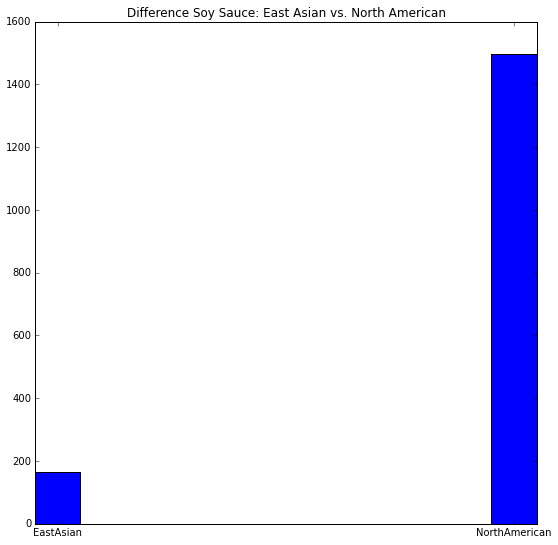

In [6]:
# sort the dataframe by alphabetical order

sorted_regions = sorted(regions)
sorted_countries = sorted(countries)
sorted_ingredients = sorted(ingredients)
sorted_details = sorted(details)
sorted_type_recipes = sorted(type_recipes)

# print sorted_regions
# print sorted_countries
# print sorted_ingredients

# print sorted_type_recipes

soysause_region = []
for region in sorted_regions:
    if 'soy_sauce' in regions[region].keys():
        value = regions[region]['soy_sauce']
        soysause_region.append(value)
    else:
        soysause_region.append(0)

EA_NA = [sorted_regions[1]]
EA_NA.append(sorted_regions[5])
print EA_NA

SS_RE = [soysause_region[1],soysause_region[5]]
print SS_RE

fig, ax = plt.subplots(figsize = (9,9))
XEANA = np.arange(len(EA_NA))
ax.set_xticks(XEANA+width/2)
ax.set_xticklabels(EA_NA)
plt.title('Difference Soy Sauce: East Asian vs. North American')
plt.bar(XEANA, SS_RE, color = 'b', width = 0.1)

['EastAsian', 'NorthAmerican']
[84, 14802]


<Container object of 2 artists>

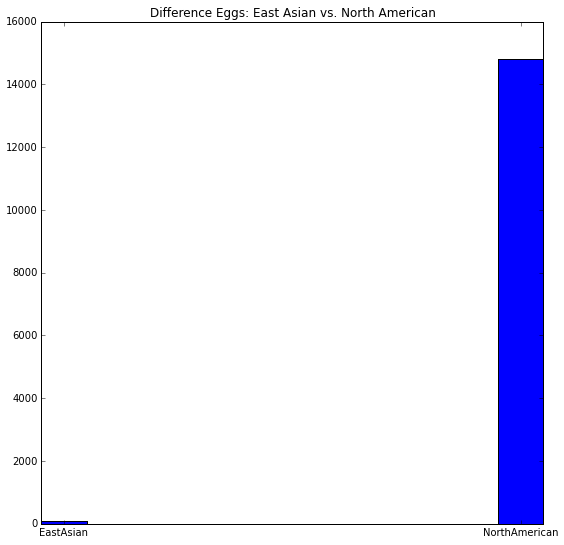

In [7]:
eggs_region = []
for region in sorted_regions:
    if 'egg' in regions[region].keys():
        value = regions[region]['egg']
        eggs_region.append(value)
    else:
        eggs_region.append(0)

EA_NA = [sorted_regions[1]]
EA_NA.append(sorted_regions[5])
print EA_NA
SS_RE = [eggs_region[1],eggs_region[5]]
print SS_RE
fig, ax = plt.subplots(figsize = (9,9))
XEANA = np.arange(len(EA_NA))
ax.set_xticks(XEANA+width/2)
ax.set_xticklabels(EA_NA)
plt.title('Difference Eggs: East Asian vs. North American')
plt.bar(XEANA, SS_RE, color = 'b', width = 0.1)

['American', 'China']
[1441, 92]


<Container object of 2 artists>

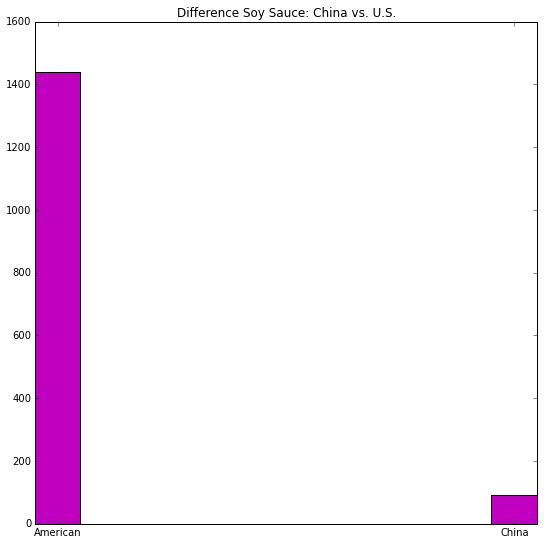

In [8]:
#Plots a bar graph for all the countries and how many of their recipes use eggs. 

soysause_countries = []

for country in sorted_countries:
    if 'soy_sauce' in countries[country].keys():
        val = countries[country]['soy_sauce']
        soysause_countries.append(val)
    else:
        soysause_countries.append(0)

CN_US = [sorted_countries[0]]
CN_US.append(sorted_countries[6])
print CN_US
SS_C = [soysause_countries[0],soysause_countries[6]]
print SS_C


fig, ax = plt.subplots(figsize = (9,9))
XCNUS = np.arange(len(CN_US))
ax.set_xticks(XCNUS+width/2)
ax.set_xticklabels(CN_US)
plt.title('Difference Soy Sauce: China vs. U.S.')
plt.bar(XCNUS, SS_C, color = 'm', width = 0.1)

['American', 'China']
[14528, 51]


<Container object of 2 artists>

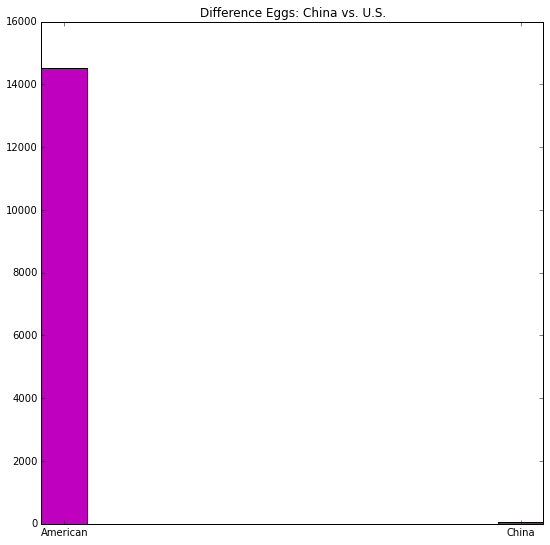

In [9]:
eggs_countries = []

for country in sorted_countries:
    if 'egg' in countries[country].keys():
        val = countries[country]['egg']
        eggs_countries.append(val)
    else:
        eggs_countries.append(0)

CN_US = [sorted_countries[0]]
CN_US.append(sorted_countries[6])
print CN_US
SS_C = [eggs_countries[0],eggs_countries[6]]
print SS_C
fig, ax = plt.subplots(figsize = (9,9))
XCNUS = np.arange(len(CN_US))
ax.set_xticks(XCNUS+width/2)
ax.set_xticklabels(CN_US)
plt.title('Difference Eggs: China vs. U.S.')
plt.bar(XCNUS, SS_C, color = 'm', width = 0.1)

['African', 'American', 'Asian', 'Cajun_Creole', 'Central_SouthAmerican', 'Chinese', 'EasternEuropean_Russian', 'English_Scottish', 'French', 'German', 'Greek', 'Indian', 'Irish', 'Italian', 'Japanese', 'Jewish', 'Mediterranean', 'Mexican', 'MiddleEastern', 'Moroccan', 'Scandinavian', 'Southern_SoulFood', 'Southwestern', 'Spanish_Portuguese', 'Thai', 'Vietnamese']


/Users/Lucas/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


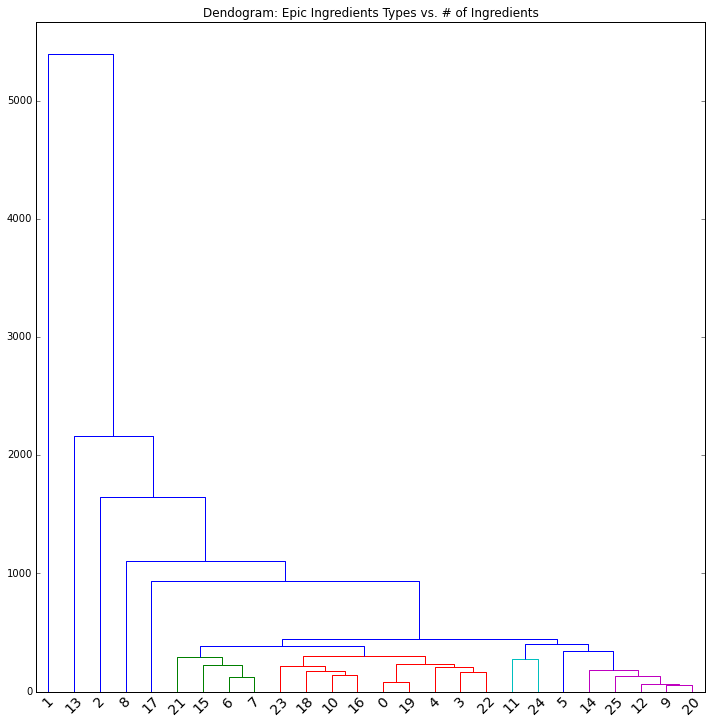

In [10]:
#Plot a dendogram of Epic Ingredients Types vs. # of Ingredients
TRdf = np.zeros(shape = (len(sorted_type_recipes), len(details)))
for TRk in type_recipes.keys():
    tr = type_recipes[TRk]
    for dk in tr.keys():
        i = sorted_type_recipes.index(TRk)
        j = sorted_details.index(dk)
        TRdf[i][j] = tr[dk]
TRLink = cl_hier.linkage(TRdf, method='complete', metric='euclidean')
TR_fig = plt.figure(figsize=(12,12))
T = cl_hier.dendrogram(TRLink, color_threshold = 300, leaf_font_size=14)
plt.title('Dendogram: Epic Ingredients Types vs. # of Ingredients')
TR_fig.show()
print sorted_type_recipes
# As you can see, the most used epic recipt is American. Chinese is not used frequently.

[24, 22, 23, 20, 21, 19, 17, 18, 16, 13, 14, 15, 2, 0, 1, 9, 12, 10, 11, 3, 4, 5, 6, 7, 8]


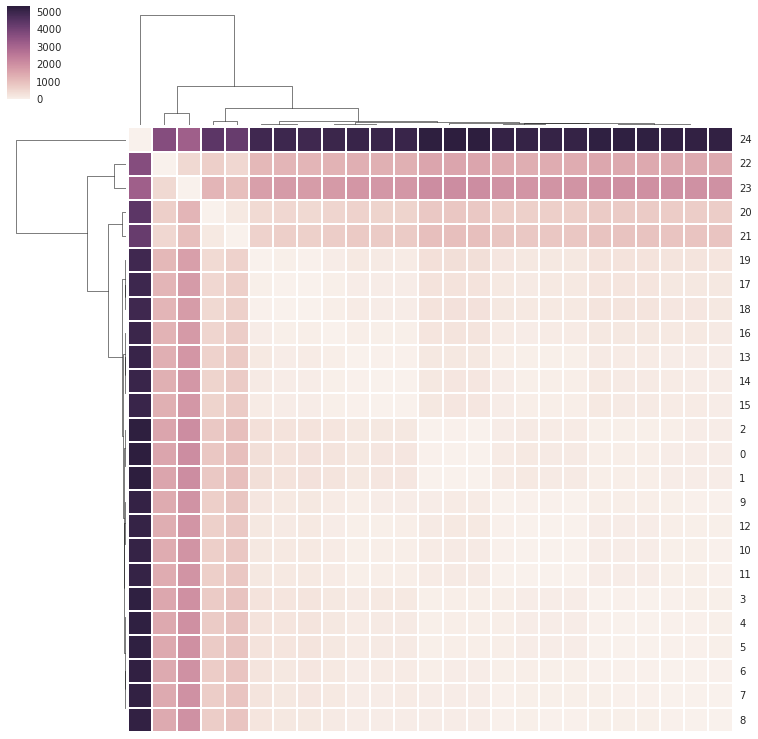

In [11]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
distances = metrics.euclidean_distances(TRLink)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print cg.dendrogram_col.reordered_ind

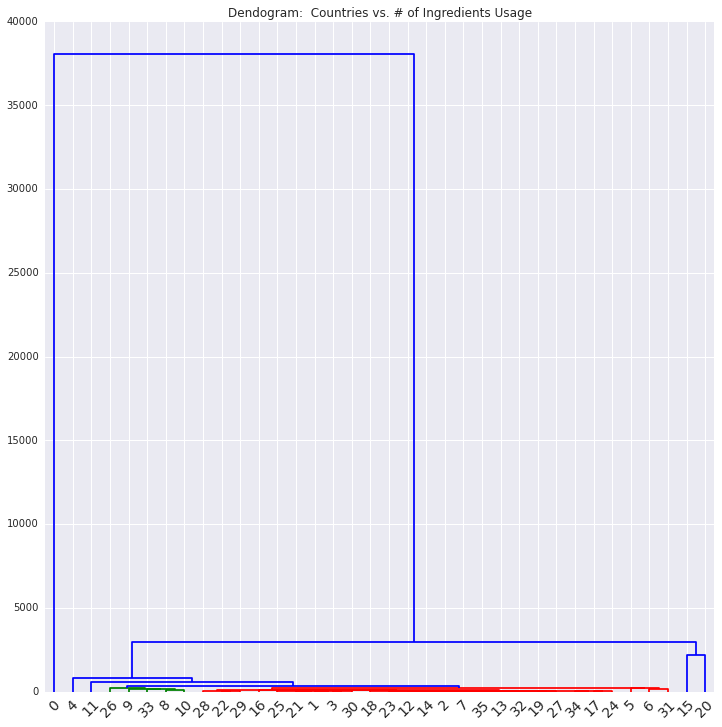

In [14]:
#Plot a dendogram of Countries vs. # of Ingredients Usage

Countriesdf = np.zeros(shape =(len(sorted_countries), len(ingredients)))
for Ck in countries.keys():
    country = countries[Ck]
    for key in country.keys():
        i = sorted_countries.index(Ck)
        j = sorted_ingredients.index(key)
        Countriesdf[i][j] = country[key]
        

CLink = cl_hier.linkage(Countriesdf, method='complete', metric='euclidean')

C_fig = plt.figure(figsize=(12,12))
T = cl_hier.dendrogram(CLink, color_threshold = 300, leaf_font_size=14)
plt.title('Dendogram:  Countries vs. # of Ingredients Usage')

C_fig.show()

# As you can see from the first list, American is 0 and China is 6

[34, 31, 28, 26, 27, 19, 14, 15, 18, 16, 17, 13, 12, 10, 11, 0, 9, 5, 6, 7, 8, 2, 1, 3, 4, 20, 21, 22, 23, 24, 25, 29, 30, 32, 33]


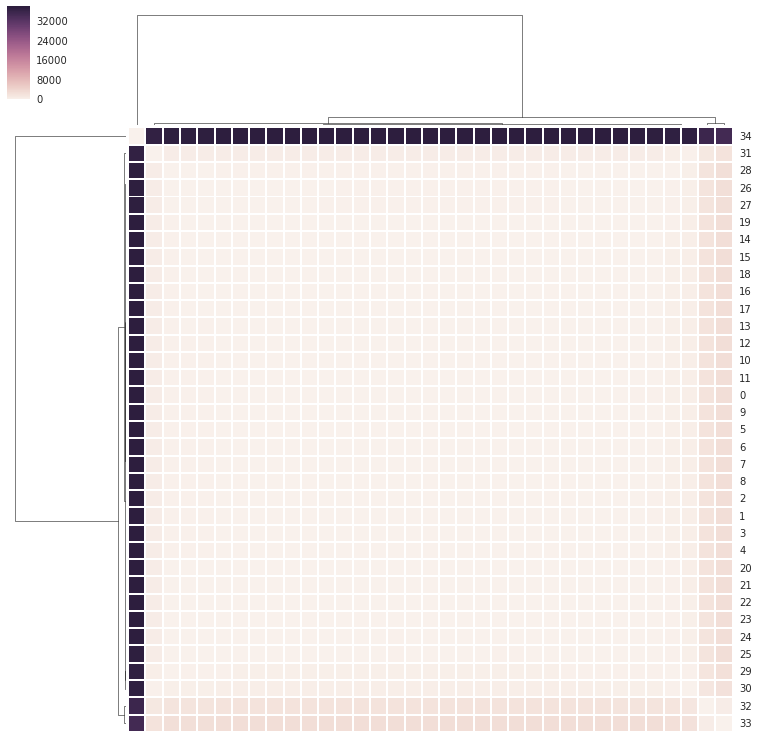

In [43]:
distances = metrics.euclidean_distances(CLink)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print cg.dendrogram_col.reordered_ind

In [6]:
# Short (datailed) analysis of specific cluster

# Please see the pdf file uploaded 


### References

1. Ahn, Yong-Yeol, et al. "Flavor network and the principles of food pairing." Scientific reports 1 (2011).

In [15]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()